### Import required packages

In [1]:
import numpy as np
import pandas as pd
import os
import sys
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import itertools  
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")

### Open the corresponding dataset based on the file encoding type and extension

In [2]:
#Open corresponding file
filename = "housing"
file_format = filename+'.csv'
filename = file_format
encoding = ['utf8','latin1','iso-8859-1','cp1252']
flag = False
encoding_list = len(encoding)
if file_format.endswith('.html'):
    dfs = pd.read_html(file_format)
    df  = pd.concat(dfs)
    df.to_csv(filename+".csv",index=False)
if file_format.endswith('.json'):
    df = pd.read_json(filename)
if 'parsed.csv' in filename:
    df = pd.read_csv(file_format, index_col=0 )
    flag = True
if flag != True:
#Try all the possible encoding schemes to see which one applies to the dataset
    for encoding_type in range(0,encoding_list-1):
        try:
            if file_format.endswith('.csv'):
                df = pd.read_csv(file_format, index_col=None , encoding = encoding[encoding_type])
                break
        except Exception:
            pass

### Display the top 5 contents of the dataset

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### Data cleaning methods

In [4]:
#Initialize the dataset that is used to apply the relevant cleaning opeea
class descriptiveStats:

    def __init__(self, df): 
        self.df = df 

    def cleanColumnData(self):
        #convert all column names into lowercase for uniformity and remove whitespaces
        df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
        #Replace all nan values in categorical columns with nothing.
        df.loc[:, df.dtypes == object].replace(np.nan,'',regex = True)

### Creating an instance for the data clean class

In [5]:
#Creating an instance for the descriptive stats class 
descriptiveData_object = descriptiveStats(df)
descriptiveData_object.cleanColumnData()

### Returns the columns that is selected by the user

In [6]:
def returnColumns(df,index):
    try:
        NumberOfIndex = index
        NumberOfHueIndex = 1
        IndexToBePlotted = []
        print("The column name and the index are listed below:\n")
        for index,column in enumerate(df.loc[:, df.dtypes != object]):
            print(index,column)
        print("\n")
        for i in range(0, NumberOfIndex):
            Number = int(input("\nEnter the column index \n"))    
            IndexToBePlotted.append(Number) 
        columns_to_plot = [df.loc[:, df.dtypes != object].columns[i] for i in IndexToBePlotted]
        return columns_to_plot
    except ValueError as e:
        print("Value error {} occured".format(e))

### Returns the columns selected by the user which is used as a Hue paramater


In [7]:
def returnHueColumns(df):
    try:
        NumberOfIndex = 1
        IndexToBePlotted = []
        print("\n")
        for index,column in enumerate(df.loc[:, df.dtypes != object]):
            print(index,column)
        print("\n")
        for i in range(0, NumberOfIndex):
            Number = input("\nEnter a column index for hue parameter or press enter to exit \n")
            if Number.isdigit():
                Number = int(Number)
            else:
                Number = str(Number)
            if Number != '':
                IndexToBePlotted.append(Number)
                hueColumns_to_plot = [df.loc[:, df.dtypes != object].columns[i] for i in IndexToBePlotted]
                return hueColumns_to_plot
            elif Number == '':
                pass
            else:
                print("Enter a valid option")
    except ValueError as e:
        print("Value error {} occured".format(e))

### Method to select the range of rows and columns used to plot

In [8]:
def selectRows(df):
    try:
        choice = input("Do you want to plot values of the entire dataset? Type Yes or No(To select a subset of data)\n")
        choice.lower()
        if choice == 'yes' or choice == 'y':
            df1 = df
            return df1
        elif choice == 'No' or choice == 'n':
            totalValues = df.shape
            choice = int(input("Select the range of values in the dataset to be plotted: \
                               \n1)Top 100 values \
                               \n2)50% of the dataset \
                               \n3)25% of the dataset \
                               \n4)Random 100 values in the dataset \
                               \n5)Random 50% data of the dataset\n"))
            if choice == 1:
                return df.loc[0:100]
            elif choice == 2:
                total =  totalValues[0]/2
                return df.loc[0:total]
            elif choice == 3:
                total = totalValues[0]/4
                return df.loc[0:total]
            elif choice == 4:
                return df.sample(n=100)
            elif choice == 5:
                total = totalValues[0]/2
                return df.sample(n=total)
            else:
                print("Enter a valid option")
        else:
            print("Please enter a valid option")
    except ValueError as e:
        print("Value error {} occured".format(e))

### Saving the plots

In [9]:
def savePlot():
    try:
        choice = input("Do you want to save the plot as a PNG file? Type Yes or no\n")
        choice.lower()
        if choice == 'yes' or choice == 'y':
            plotName = input("Enter the name in which you want to save the file\n")
            if plotName != '':
                plt.savefig(plotName+".png" ,bbox_inches='tight')
                print("File saved")
            else:
                print("Enter a valid name")
        elif choice == 'No' or choice == 'n':
            pass
        else:
            print("Please enter a valid option")
    except ValueError as e:
        print("Value error {} occured".format(e))

### Method to visualize the Numerical data based on user selected plot type

In [10]:
def visualization(df):
    try:
        choice = input("Do you want to visualize the columns? Type Yes or no\n")
        choice.lower()
        #User selects the type of visualization
        if choice == 'yes' or choice == 'y':
            plotType = int(input("Choose the type of visualization: \
                                 \n1: Boxplot \
                                 \n2: Countplot \
                                 \n3: Distance plot \
                                 \n4: ScatterPlot \
                                 \n5: Line Plot \
                                 \n6: HeatMaps\n"))
            #boxplot can take either 1 or 2 arguments so the user could select any
            if plotType == 1 :
                NumberOfIndex = int(input("Choose the number of column you want to visualize: \
                                          \n1.Single Column Visualization \
                                          \n2.Two column Visualization\n"))
            elif plotType == 4 or plotType == 5:
                NumberOfIndex = 2
            else:
                NumberOfIndex = 1
            #returnColumns() method returns the numerical column names and indixes and prompts the user to enter the column index
            #Invoke 'selectRows' method to select the range of values to plot
            #returnHueColumns() used in the below lines prompts the user for hue paramter and the respective column index 
            if plotType == 1 :
                if NumberOfIndex == 1:
                    columns_to_plot = returnColumns(df,NumberOfIndex)
                    for index in range(0 , len(columns_to_plot)):
                        sns.set(style="whitegrid")
                        plt.figure(figsize=(10,8))
                        plt.title("Box plot of the column "+columns_to_plot[index])
                        df1 = selectRows(df)
                        sns.boxplot(x=columns_to_plot[index], data=df1, orient="v")
                        savePlot()
                else:
                    columns_to_plot = returnColumns(df,NumberOfIndex)
                    hueColumns_to_plot = returnHueColumns(df)
                    for index in range(0 , len(columns_to_plot)-1):
                        sns.set(style="whitegrid")
                        plt.figure(figsize=(10,8))
                        plt.title("Box plot of the columns "+columns_to_plot[index]+" "+"and"+" "+columns_to_plot[index+1])
                        df1 = selectRows(df)
                        if hueColumns_to_plot == None:
                            sns.boxplot(x=columns_to_plot[index], y=columns_to_plot[index+1] , data=df1, orient="v")
                        else:
                            sns.boxplot(x=columns_to_plot[index], y=columns_to_plot[index+1] , hue = hueColumns_to_plot[0], data=df1, orient="v")
                        savePlot()
            elif plotType == 2:
                columns_to_plot = returnColumns(df,NumberOfIndex)
                hueColumns_to_plot = returnHueColumns(df)
                for index in range(0 , len(columns_to_plot)):
                    sns.set(style='darkgrid')
                    plt.figure(figsize=(20,10))
                    plt.title("Count plot of the column "+columns_to_plot[index])
                    df1 = selectRows(df)
                    if hueColumns_to_plot == None:
                        sns.countplot(x=columns_to_plot[index], data=df1)
                    else:
                        sns.countplot(x=columns_to_plot[index], hue=hueColumns_to_plot[0], data=df1)
                    savePlot()
            elif plotType == 3:
                columns_to_plot = returnColumns(df,NumberOfIndex)
                for index in range(0 , len(columns_to_plot)):
                    filter_data = df.dropna(subset=[columns_to_plot[index]])
                    plt.figure(figsize=(14,8))
                    plt.title("Distance plot of the column "+columns_to_plot[index])
                    sns.distplot(filter_data[columns_to_plot[index]], kde=True, rug=False)
                    savePlot()
            elif plotType == 4:
                columns_to_plot = returnColumns(df,NumberOfIndex)
                hueColumns_to_plot = returnHueColumns(df)
                for index in range(0 , len(columns_to_plot)-1):
                    sns.set(style='darkgrid')
                    plt.figure(figsize=(20,10))
                    plt.title("Scatter plot of the columns "+columns_to_plot[index]+" "+"and"+" "+columns_to_plot[index+1])
                    df1 = selectRows(df)
                    if hueColumns_to_plot == None:
                        sns.scatterplot(x=columns_to_plot[index],y=columns_to_plot[index+1], data=df1)
                    else:
                        sns.scatterplot(x=columns_to_plot[index],y=columns_to_plot[index+1], hue=hueColumns_to_plot[0], data=df1 , sizes=(20, 100))
                    savePlot()
            elif plotType == 5:
                columns_to_plot = returnColumns(df,NumberOfIndex)
                hueColumns_to_plot = returnHueColumns(df)
                for index in range(0 , len(columns_to_plot)-1):
                    sns.set(style='darkgrid')
                    plt.figure(figsize=(20,10))
                    plt.title("Line plot of the column "+columns_to_plot[index])
                    df1 = selectRows(df)
                    if hueColumns_to_plot == None:
                        sns.lineplot(x=columns_to_plot[index], y=columns_to_plot[index+1], data=df1)
                    else:
                        sns.lineplot(x=columns_to_plot[index], y=columns_to_plot[index+1], hue=hueColumns_to_plot[0] , data=df1)
                    savePlot()
            elif plotType == 6:
                #compute correlations between columns of type float and plot a heatmap out of it
                plt.title("Heat Map of Numerical Data ")
                corr = df.loc[:,df.dtypes != 'object'].corr()
                sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))
                savePlot()
            else:
                print("Please enter a valid choice")
        elif choice == 'no' or choice == 'n':
            pass
        else:
            print("Please enter a valid choice")
    except ValueError as e:
        print("Value error {} occured".format(e))

### Invoke the visualization method

Do you want to visualize the columns? Type Yes or no
y
Choose the type of visualization:                                  
1: Boxplot                                  
2: Countplot                                  
3: Distance plot                                  
4: ScatterPlot                                  
5: Line Plot                                  
6: HeatMaps
1
Choose the number of column you want to visualize:                                           
1.Single Column Visualization                                           
2.Two column Visualization
1
The column name and the index are listed below:

0 rooms
1 price
2 distance
3 postcode
4 bedroom2
5 bathroom
6 car
7 landsize
8 buildingarea
9 yearbuilt
10 lattitude
11 longtitude
12 propertycount



Enter the column index 
9
Do you want to plot values of the entire dataset? Type Yes or No(To select a subset of data)
n
Select the range of values in the dataset to be plotted:                                
1)Top 100 values  

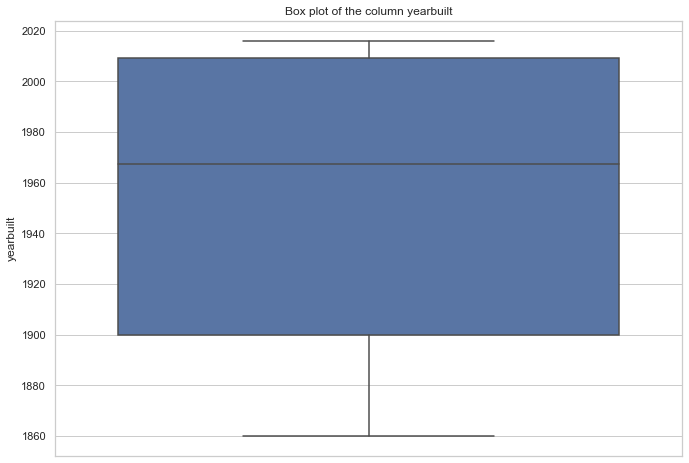

In [11]:
visualization(df)